In [1]:
import tskit
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ts = tskit.load("/nfs_home/users/osvk/projects/ukb_trees/tsinfer_testing/sample_load_testing/data/chr22/N20000/my.inferred.trees")
ts

In [3]:
sites_with_one_mut = np.where(np.bincount(ts.mutations_site, minlength=ts.num_sites)==1)[0]
sites_pos_with_one_mut = np.take(ts.sites_position, sites_with_one_mut)

In [4]:
#randomly select n query snps without replacement, from the list of sites with single mutation 
#for each snp, randomly select a snp <200kb away
#calculate r2 and note time taken
import time
ldcalc = tskit.LdCalculator(ts)
n = 500
max_dist = 200_000
query_sites = np.random.choice(sites_with_one_mut, size = n, replace=False)
r2 = []
compute_times = []
for a in query_sites:
    a_pos = ts.sites_position[a]
    ld_range = np.where((sites_pos_with_one_mut >= a_pos - max_dist) & (sites_pos_with_one_mut <= a_pos + max_dist))[0]
    rand_ind = np.random.choice(ld_range)
    b = sites_with_one_mut[rand_ind]
    b_pos = sites_pos_with_one_mut[rand_ind]
    start_time = time.time()
    r2.append(ldcalc.r2(a, b))
    compute_times.append(time.time() - start_time)
    #print(f"LD between site {a} (position {a_pos} bp) and site {b} (position {b_pos} bp) located {abs(a_pos - b_pos)/1_000} kb apart is r2={r2}")
print(r2)
print(compute_times)

[6.250312511719142e-10, 1.09870315492593e-05, 6.8770630716416856e-09, 6.250312511719142e-10, 1.875187515235547e-09, 6.250312511719142e-10, 6.250312511719142e-10, 6.251093902363578e-09, 1.2500937554690433e-09, 6.250312511719142e-10, 5.0011252281707125e-09, 6.250312511719142e-10, 6.250312511719142e-10, 6.250312511719142e-10, 1.250093755469043e-09, 3.750656350796428e-09, 6.250312511719142e-10, 3.750468794535059e-09, 8.237991302535379e-07, 5.000750087509376e-09, 6.250312511719142e-10, 3.1254688105544937e-09, 1.875187515235547e-09, 2.0632220851758564e-08, 7.386263507111411e-08, 1.8755157316602865e-08, 6.250312511719142e-10, 1.2500937554690433e-09, 6.250312511719142e-10, 2.6904594330702803e-08, 8.127844679599122e-09, 5.000750087509376e-09, 6.250312511719142e-10, 3.750468794535059e-09, 1.024627335689031e-05, 6.250312511719142e-10, 2.0647191472349534e-07, 3.750656350796428e-09, 6.296005759718274e-05, 8.127844679599122e-09, 6.250312511719142e-10, 1.2500937554690433e-09, 6.250312511719142e-10, 1

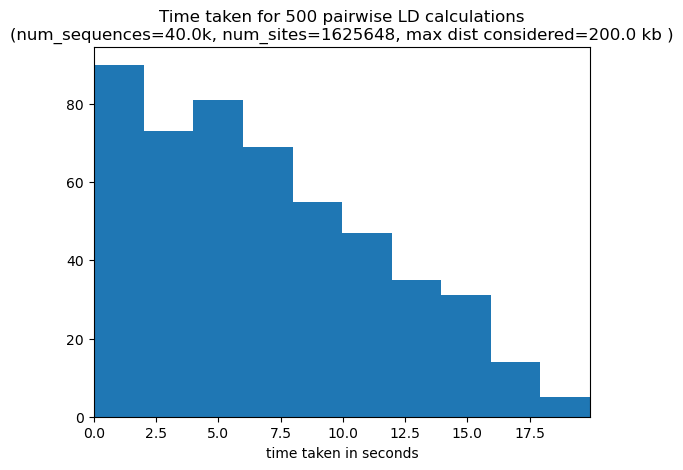

In [5]:
plt.hist(compute_times)
plt.title(f"Time taken for {n} pairwise LD calculations\n(num_sequences={ts.num_samples/1_000}k, num_sites={len(sites_with_one_mut)}, max dist considered={max_dist/1_000} kb )")
plt.xlabel("time taken in seconds")
plt.xlim(0,max(compute_times))
plt.show()